# Task 4.10 Part 2 - Visualizations

## Contents
#### *Important note Due to the large dataset of the data and RAM, the main dataframe has a 30% random sample from the original dataframe at the end of 4.9.*

### 1. Importing libraries and data
### 2. Data checks & preparation
### 3. Create subsets
        3a. Customer subset
        3b. Order subset
### 4. Visualizations for key questions
        Question 1.  Busiest day and times for orders
        Question 2: Time when most money is spent
        Question 3. Product price breakdown 
        Question 4:  Popularity of products and departments
            -- Number of products available in top 10 departments
            -- Top 10 selling departments
        Question 5:  Customer type and ordering behavior
                -- Customer Loyalty
                -- Median days between orders due to customer loyalty
                -- Customer loyalty by region
                -- Common ordering day by customer loyalty
                -- Order day by income range
                -- Pet supply purchases and gender
                -- Pet supply purchases and state
                -- Snack purchases by hour
                -- Age range vs. income

### 5.  Final overview of dataframe
### 6.  Export data and visualizations
### 7.  Summmary of data

## 1. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# creating path
path = r'C:\Users\there\Desktop\Career Foundry\06.2022 Instacart Basket Analysis'

In [3]:
# importing main dataframe
# Note this main dataframe is still 30% random subset of the entire dataframe. 
df = pd.read_pickle(os.path.join(path,'02 - Data', 'Prepared Data', '4.10_part1.pkl'))

In [4]:
# importing region dataframe
df_region = pd.read_pickle(os.path.join(path,'02 - Data', 'Prepared Data', '4.10_region.pkl'))

## 2. Data checks and preparation

In [5]:
df.shape

(9270020, 38)

In [6]:
df_region.shape

(4, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9270020 entries, 0 to 32390080
Data columns (total 38 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int32  
 1   customer_id             int32  
 2   eval_set                object 
 3   order_number            int8   
 4   order_day_of_week       int8   
 5   order_hour_of_day       int8   
 6   days_since_prior_order  float64
 7   product_id              int32  
 8   add_to_cart_order       int16  
 9   reordered               int8   
 10  Unnamed: 0_x            int64  
 11  product_name            object 
 12  prices                  float64
 13  price_range_loc         object 
 14  Busiest day             object 
 15  Busiest days            object 
 16  Most Orders             object 
 17  gender                  object 
 18  state                   object 
 19  age                     int8   
 20  date_joined             object 
 21  #_of_dependants         int8  

In [8]:
df_region.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, midwest to west
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sum_of_sales             4 non-null      float64
 1   customer_count           4 non-null      int64  
 2   orders_placed            4 non-null      int64  
 3   avg_price_per_order      4 non-null      float64
 4   avg_price_per_customer   4 non-null      float64
 5   avg_orders_per_customer  4 non-null      float64
dtypes: float64(4), int64(2)
memory usage: 224.0+ bytes


## 3. Create subsets to answer key questions

In [9]:
# create a df that just lists orders (and only necessary columns)
orders = df.drop_duplicates(subset='order_id')
orders.shape

(2742363, 38)

In [10]:
# create a df that just lists orders (and only necessary columns)
customers = df.drop_duplicates(subset='customer_id')
customers.shape

(205302, 38)

## 4. Visualizations for Key Questions

### Question 1) The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders.

In [11]:
# map the meaning of day of the week from 0-6, to name of day
df.loc[df['order_day_of_week'] == 0, 'day_of_week'] = 'Saturday'

In [12]:
df.loc[df['order_day_of_week'] == 1, 'day_of_week'] = 'Sun'
df.loc[df['order_day_of_week'] == 2, 'day_of_week'] = 'Mon'
df.loc[df['order_day_of_week'] == 3, 'day_of_week'] = 'Tues'
df.loc[df['order_day_of_week'] == 4, 'day_of_week'] = 'Wed'
df.loc[df['order_day_of_week'] == 5, 'day_of_week'] = 'Thur'
df.loc[df['order_day_of_week'] == 6, 'day_of_week'] = 'Fri'

In [13]:
# check frequency
df['day_of_week'].value_counts()

Saturday    1775004
Sun         1621232
Fri         1285708
Mon         1206101
Thur        1202619
Tues        1098777
Wed         1080579
Name: day_of_week, dtype: int64

#### Orders by day

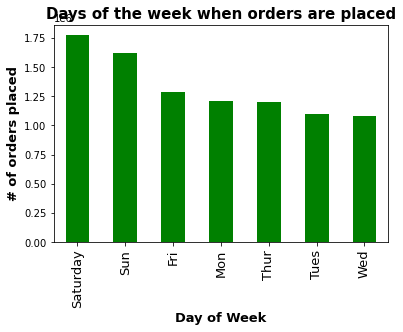

In [14]:
# orders placed each day of the week
Orders_by_day_bar = df['day_of_week'].value_counts().plot.bar(color = ['green'])
plt.xlabel('Day of Week', fontsize = 13, fontweight = 'bold')
plt.ylabel('# of orders placed', fontsize = 13, fontweight = 'bold')
plt.title('Days of the week when orders are placed', fontsize = 15, fontweight = 'bold')
plt.xticks(fontsize=13)
plt.show()

#### Orders by hour

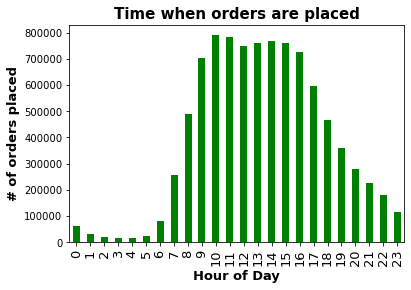

In [15]:
# orders placed during time of day
Orders_by_hour_bar = df['order_hour_of_day'].value_counts().sort_index().plot.bar(color = ['green'])
plt.xlabel('Hour of Day', fontsize = 13, fontweight = 'bold')
plt.ylabel('# of orders placed', fontsize = 13, fontweight = 'bold')
plt.title('Time when orders are placed', fontsize = 15, fontweight = 'bold')
plt.xticks(fontsize=13)
plt.show()

    Results:  I recommend scheduling ads on Tuesdays and Wednesdays from 11pm - 6am, as that is when there are fewest
    purchases. 

## Question 2: They also want to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times.

    Results:  Most of the purchases are between 8am - 6pm on Saturday and Sundays. 

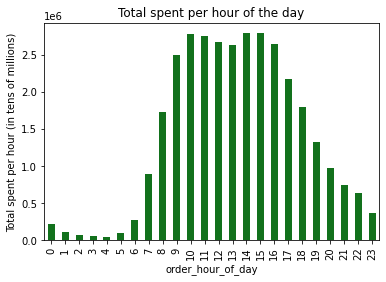

In [16]:
# total money by hour of day
data1 = orders.groupby(['order_hour_of_day'])['avg_price'].sum()
avg_bar_cost_hours = data1.plot.bar(ylabel='Total spent per hour (in tens of millions)',
                               color = sns.color_palette("dark")[2], 
                               title='Total spent per hour of the day')

## Question 3: Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

In [17]:
print(df['price_range_loc'].unique())

['Mid-range product' 'Low-range product' 'High-range product']


Text(0.5, 1.0, 'Histogram: Prices of products purchased')

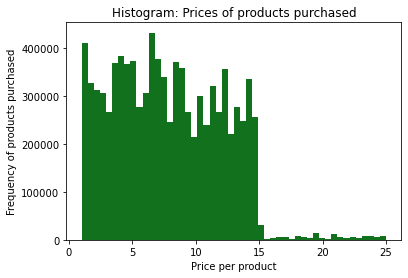

In [18]:
# Price ranges
# Greater than 15 are High range products, between 6-15 are mid-range products, and 5 and below are low range products. 
hist_prices = df['prices'].plot.hist(bins=50, color = sns.color_palette("dark")[2])
plt.xlabel('Price per product')
plt.ylabel('Frequency of products purchased')
plt.title('Histogram: Prices of products purchased')

Text(0.5, 1.0, 'Histogram: Prices of products purchased')

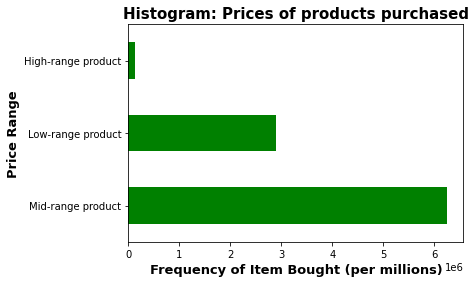

In [19]:
# frequency of price ranges
# Greater than 15 are High range products, between 6-15 are mid-range products, and 5 and below are low range products. 
bar_price_range_loc = df['price_range_loc'].value_counts().plot.barh(color = ['green'])
plt.xlabel('Frequency of Item Bought (per millions)', fontsize=13, fontweight = 'bold')
plt.ylabel('Price Range', fontsize = 13, fontweight = 'bold')
plt.title('Histogram: Prices of products purchased', fontsize=15, fontweight = 'bold')

In [20]:
price_range_products = df[['price_range_loc','product_id']].groupby(['price_range_loc']).nunique().sort_index

In [21]:
price_range_products

<bound method DataFrame.sort_index of                     product_id
price_range_loc               
High-range product         542
Low-range product        15519
Mid-range product        31055>

    Results:  Most purchases fall between $6-$15 in the mid range category.  Fewest prices are purchases $15 
    and greater. 

## Question 4: Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

#### Number of products available in top 10 departments

Text(0.5, 0, 'Number of products')

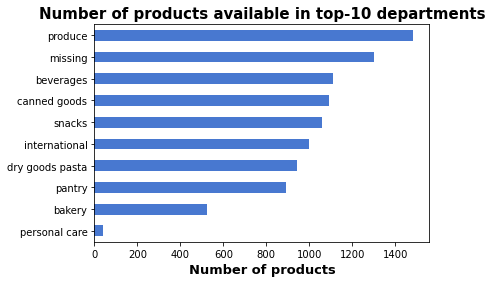

In [22]:
data3 = (df[['department', 'product_id']].groupby(['department'])
        .nunique().sort_values(by='product_id')).head(10)
bar_products_1 = data3.plot.barh(color = sns.color_palette("muted")[0], legend=None)
plt.title('Number of products available in top-10 departments', fontsize = 15, fontweight = 'bold')
plt.ylabel('')
plt.xlabel('Number of products', fontsize=13, fontweight = 'bold')

    Results: Produce department has the highest number of products available. 

#### Number of products purchased top 10 departments

Text(0.5, 1.0, 'Number of products sold in top-10 departments')

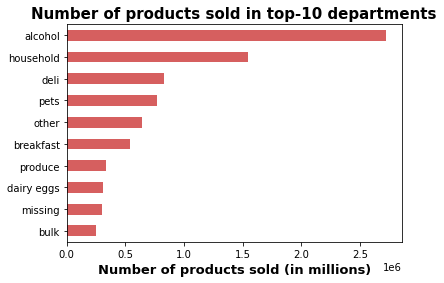

In [23]:
data4 = df['department'].value_counts().sort_values().tail(10)
bar_products_2 = data4.plot.barh(color = sns.color_palette("muted")[3], legend=None)
plt.xlabel('Number of products sold (in millions)', fontsize=13, fontweight='bold')
plt.title('Number of products sold in top-10 departments', fontsize=15, fontweight='bold')

    Results:  Alcohol department has the highest number of sales

## Question 5:  The marketing and sales teams are particularly interested in the different types of customers in their system and how their ordering behaviors differ.

'Ordering habits' can be defined in a number of ways. Some examples:
 > - common order day
 > - days in between orders
 > - average order cost
 > - total number of orders
 > - total spent

#### Customer loyalty

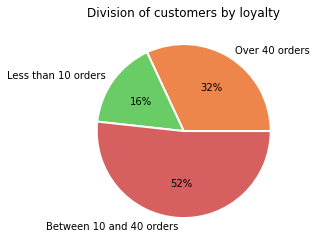

In [24]:
data5 = customers['loyalty_flag'].value_counts().sort_index()
pie_loyalty_customers = data5.plot.pie(autopct=('%1.0f%%'), colors = sns.color_palette("muted")[1:4],
                                      wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
                                      legend=None, ylabel='', title='Division of customers by loyalty',
                                      labels =['Over 40 orders', 'Less than 10 orders', 'Between 10 and 40 orders'])
                                                  

    Results: 52% of place between 10-40 orders, which are deemed as a Normal Customer. 

#### median days between orders

Text(0.5, 1.0, 'Median days between orders for customers')

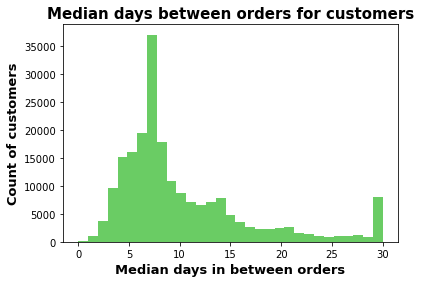

In [25]:
# visualize frequency of median_day_between orders for all customers
hist_median_days = customers['median_order_duration'].plot.hist(bins=31, color=sns.color_palette("muted")[2])
plt.xlabel('Median days in between orders', fontsize=13, fontweight='bold')
plt.ylabel('Count of customers', fontsize=13, fontweight='bold')
plt.title('Median days between orders for customers', fontsize=15, fontweight='bold')

In [26]:
df['median_order_duration'].value_counts().sort_values(ascending=False)

7.0     1678901
6.0      880815
8.0      796259
5.0      734535
4.0      684799
         ...   
27.5       1470
26.5       1348
29.5       1259
1.5         429
0.5          26
Name: median_order_duration, Length: 61, dtype: int64

    Results:  Most customers order every 7 days

In [27]:
# mean of median_days_between orders based on loyalty_flag
cross_median_loyalty = df.groupby('loyalty_flag').agg({'median_order_duration':['mean']})
cross_median_loyalty

,median_order_duration
,mean
loyalty_flag,
Loyal Customer,5.170608
New Customer,18.043116
Regular Customer,10.610199


In [28]:
cross_median_loyalty.to_clipboard()

Text(0.5, 0, 'median days between orders')

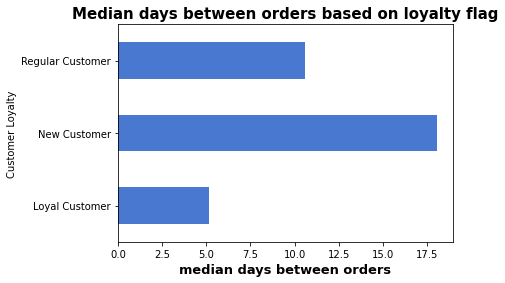

In [29]:
# creating horizontal bar char to show median order duration per customer loyalty
data6 = df.groupby('loyalty_flag').agg({'median_order_duration':['mean']})
bar_median_order_loyalty = data6.plot.barh(color = sns.color_palette("muted")[0], legend=None)
plt.title('Median days between orders based on loyalty flag', fontsize = 15, fontweight = 'bold')
plt.ylabel('Customer Loyalty')
plt.xlabel('median days between orders', fontsize=13, fontweight = 'bold')

    Results: The average time between orders for loyal customers is 5 days

#### customer loyalty according to region

In [30]:
# number of customers by type in each region
cross_region=pd.crosstab(customers['loyalty_flag'], customers['region'])

In [31]:
cross_region

region,midwest,northeast,south,west
loyalty_flag,,,,
Loyal Customer,15257,11558,21940,16814
New Customer,7868,5951,11204,8498
Regular Customer,25192,18724,35274,27022


In [32]:
# percentage of customers in each region by type
cross_region2=pd.crosstab(customers['loyalty_flag'], customers['region']).apply(lambda r: round(r/r.sum()*100,2), axis=0)

In [33]:
cross_region2

region,midwest,northeast,south,west
loyalty_flag,,,,
Loyal Customer,31.58,31.90,32.07,32.13
New Customer,16.28,16.42,16.38,16.24
Regular Customer,52.14,51.68,51.56,51.63


In [34]:
cross_region2.to_clipboard()

       Results: The largest percentage of customers are regular customers.  This is across the board for every region; however, nothing really stands out.  

#### common ordering day

In [35]:
# map the meaning of days 0-6 to days Sat-Fri
days = pd.DataFrame(data={'days':['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']})

Text(0.5, 1.0, 'Frequency of most common order days')

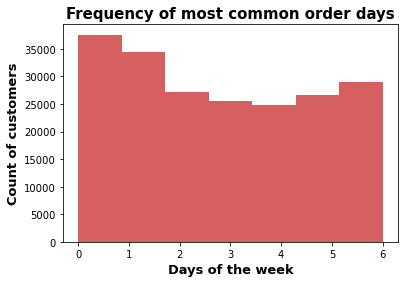

In [36]:
# create histogram with count of orders by day of the week
hist_common_day = customers['order_day_of_week'].plot.hist(bins=7, color = sns.color_palette("muted")[3])
plt.xlabel('Days of the week', fontsize=13, fontweight ='bold')
plt.ylabel('Count of customers', fontsize=13, fontweight ='bold')
plt.title('Frequency of most common order days', fontsize=15, fontweight ='bold')

In [37]:
# create crosstab of percentage of orders by customers loyalty for each day of the week. 
x2 = round(pd.crosstab(customers['order_day_of_week'], customers['loyalty_flag'], normalize='columns')*100, 2)
x2 = x2.sort_index(ascending=False)
x2 = x2.merge(days, how='inner', left_index=True, right_index=True).set_index('days')
x2

,Loyal Customer,New Customer,Regular Customer
days,,,
Fri,13.98,14.29,14.14
Thu,13.04,12.85,12.98
Wed,12.05,12.37,12.04
Tue,12.33,12.31,12.54
Mon,13.16,13.17,13.35
Sun,16.89,16.70,16.79
Sat,18.55,18.31,18.15


Text(0, 0.5, '')

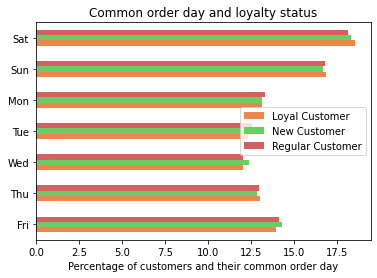

In [38]:
# bar chart displaying customer loyalty
bar_common_day_loyalty = x2.plot.barh(color = sns.color_palette("muted")[1:4])
plt.title('Common order day and loyalty status')
plt.xlabel('Percentage of customers and their common order day')
plt.ylabel('')

    Results:  Overall there is not much of a difference between loyalty and ordering days; however, Saturdays are when the most orders are placed and Loyal Customers place the most orders on Saturdays.  Wednesday was when customers place fewest orders, and New Customers purchase the most on Wednesdays.  Wednesday might be a good idea to include promotions for new customers. 

#### order day by income range

In [39]:
# percent of income received by loyalty flag each day of the week. 
x3 = round(pd.crosstab(df['order_day_of_week'], df['income_flag'], normalize='index')*100,2)
x3 = x3.merge(days, how='inner', left_index=True, right_index=True).set_index('days')
x3

,High Income,Low Income,Middle Income
days,,,
Sat,8.81,9.93,81.26
Sun,8.59,13.64,77.77
Mon,8.60,13.28,78.12
Tue,8.67,13.05,78.28
Wed,8.87,12.92,78.21
Thu,8.82,13.11,78.07
Fri,8.98,10.18,80.84


Text(0, 0.5, '')

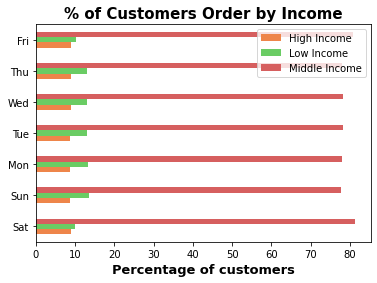

In [40]:
# bar chart displaying customer loyalty
bar_income_dow = x3.plot.barh(color = sns.color_palette("muted")[1:4])
plt.title('% of Customers Order by Income', fontsize = 15, fontweight='bold')
plt.xlabel('Percentage of customers', fontsize = 13, fontweight='bold')
plt.ylabel('')

    Results: The largest percentage of cusomters purchasing each day fall in the range of Middle Income. The fewest
    purchasing each day are high income customers. 

#### pets and gender

In [41]:
# percent of males/females who purchase pet products
crosstb_gender_pets = round(pd.crosstab(df['pet_stuff'],df['gender'], normalize=True)*100,2)

In [42]:
crosstb_gender_pets

gender,Female,Male
pet_stuff,,
0,7.37,7.59
1,42.29,42.74


Text(0, 0.5, '% of purchases')

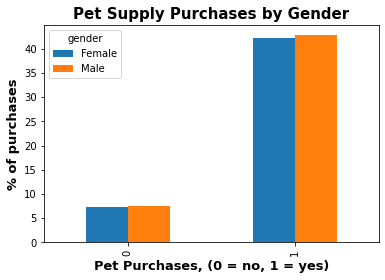

In [43]:
bar_gender_pets = round(pd.crosstab(df['pet_stuff'],df['gender'], normalize=True)*100,2).plot(kind='bar')
plt.title('Pet Supply Purchases by Gender', fontsize = 15, fontweight='bold')
plt.xlabel('Pet Purchases, (0 = no, 1 = yes)', fontsize = 13, fontweight='bold')
plt.ylabel('% of purchases', fontsize=13, fontweight='bold')

    Results: There is no difference between the amount of pets supplies that males/females purchase; however, there is a signifant amount customers that purchase pet products compared to those that don't. 

#### pet supplies sold by state

In [44]:
# creating flag for just customers that have a 1 for purchasing pet supplies
df.loc[df['pet_stuff'] == 1, 'pet_owner'] = 'yes'
df['pet_owner'].value_counts(dropna=False)

yes    7882948
NaN    1387072
Name: pet_owner, dtype: int64

In [45]:
# % of people who buy pet products by state
xpet_state = pd.crosstab(df['state'], df['pet_owner'], normalize='columns')*100
xpet_state           
                        

pet_owner,yes
state,
Alabama,1.955296
Alaska,1.970024
Arizona,2.036459
Arkansas,1.968553
California,2.049994
Colorado,1.950539
Connecticut,1.917037
Delaware,1.986896
District of Columbia,1.902968


In [46]:
xpet_state.to_clipboard()

In [47]:
# top 5 states that purchase pet products
top5_state_pet = df[['state', 'pet_owner']].value_counts().sort_values(ascending=False).head()
top5_state_pet

state         pet_owner
Pennsylvania  yes          165620
California    yes          161600
Georgia       yes          161059
Arizona       yes          160533
Rhode Island  yes          160454
dtype: int64

In [48]:
top5_state_pet.to_clipboard()

    Results:  
        Top 5 States that purchase pet products
            - Pennsylvania
            - California
            - Georgia
            - Arizona
            - Rhode Island

#### snacks and hour of day

In [49]:
# snacks are bought during peak ordering hours more often than frozen stuff
# frozen stuff is bought more often at off-peak times
cross_snacks = round(pd.crosstab(orders['order_hour_of_day'], orders['snacks'], normalize=True)*100,2)
cross_snacks

snacks,0,1
order_hour_of_day,,
0,0.65,0.02
1,0.35,0.01
2,0.21,0.01
3,0.15,0.00
4,0.16,0.00
5,0.26,0.01
6,0.85,0.04
7,2.58,0.12
8,5.02,0.20


Text(0, 0.5, 'Frequency of Snack Purchases')

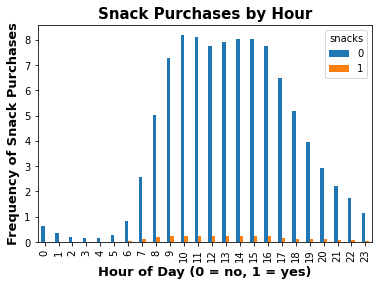

In [50]:
bar_snacks = round(pd.crosstab(orders['order_hour_of_day'],orders['snacks'], normalize=True)*100,2).plot(kind='bar')
plt.title('Snack Purchases by Hour', fontsize = 15, fontweight='bold')
plt.xlabel('Hour of Day (0 = no, 1 = yes)', fontsize = 13, fontweight='bold')
plt.ylabel('Frequency of Snack Purchases', fontsize=13, fontweight='bold')

In [51]:
df[['order_hour_of_day','snacks']].value_counts().sort_values(ascending=False)

order_hour_of_day  snacks
10                 0         752531
11                 0         749096
14                 0         731951
15                 0         726461
13                 0         724088
12                 0         715352
16                 0         693779
9                  0         664806
17                 0         572398
8                  0         460066
18                 0         449655
19                 0         343695
20                 0         262213
7                  0         237747
21                 0         211253
22                 0         169447
23                 0         108255
6                  0          77385
0                  0          59489
9                  1          37813
10                 1          37779
14                 1          37102
13                 1          36629
15                 1          35709
11                 1          35221
12                 1          33789
1                  0          31710
16

    Results:  Snacks are most frequently bought between the hours of 9-3pm

#### Age range vs income

In [52]:
x_age_income = round(pd.crosstab(customers['income_flag'], customers['age'], normalize='index')*100, 2)
x_age_income

age,18,19,20,21,22,23,24,25,26,27,...,72,73,74,75,76,77,78,79,80,81
income_flag,,,,,,,,,,,,,,,,,,,,,
High Income,0.12,0.07,0.08,0.11,0.11,0.08,0.13,0.11,0.14,0.09,...,2.38,2.35,2.45,2.60,2.33,2.43,2.45,2.36,2.33,2.38
Low Income,1.94,2.27,2.13,2.06,2.17,2.19,1.99,2.10,2.13,1.97,...,1.21,1.35,1.26,1.14,1.21,1.31,1.25,1.32,1.25,1.29
Middle Income,1.61,1.62,1.59,1.57,1.58,1.52,1.62,1.52,1.61,1.60,...,1.58,1.54,1.57,1.58,1.58,1.56,1.56,1.54,1.54,1.57


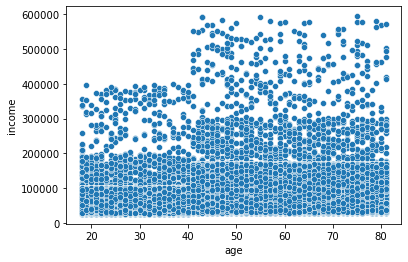

In [53]:
age_income_scat = sns.scatterplot(x = 'age', y = 'income', data = customers)


## 5. Final overview of dataframes

In [54]:
df.shape

(9270020, 40)

In [55]:
df.head()

,order_id,customer_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,department,region,exclusion_flag,age_range,pet_stuff,baby_stuff,snacks,income_flag,day_of_week,pet_owner
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,pets,south,Normal activity customer,1,1,1,0,Low Income,Mon,yes
2,473747,1,prior,3,3,12,21.0,196,1,1,...,pets,south,Normal activity customer,1,1,1,0,Low Income,Tues,yes
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,pets,south,Normal activity customer,1,1,1,0,Low Income,Wed,yes
6,550135,1,prior,7,1,9,20.0,196,1,1,...,pets,south,Normal activity customer,1,1,1,0,Low Income,Sun,yes
60,1870022,15,prior,17,2,16,8.0,196,6,1,...,pets,midwest,Normal activity customer,3,1,1,0,Middle Income,Mon,yes


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9270020 entries, 0 to 32390080
Data columns (total 40 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int32  
 1   customer_id             int32  
 2   eval_set                object 
 3   order_number            int8   
 4   order_day_of_week       int8   
 5   order_hour_of_day       int8   
 6   days_since_prior_order  float64
 7   product_id              int32  
 8   add_to_cart_order       int16  
 9   reordered               int8   
 10  Unnamed: 0_x            int64  
 11  product_name            object 
 12  prices                  float64
 13  price_range_loc         object 
 14  Busiest day             object 
 15  Busiest days            object 
 16  Most Orders             object 
 17  gender                  object 
 18  state                   object 
 19  age                     int8   
 20  date_joined             object 
 21  #_of_dependants         int8  

In [57]:
df_region.shape

(4, 6)

In [58]:
df_region.head()

,sum_of_sales,customer_count,orders_placed,avg_price_per_order,avg_price_per_customer,avg_orders_per_customer
region,,,,,,
midwest,17719063.7,48346,650524,27.238140,366.505268,13.455591
northeast,13323573.2,36255,488726,27.261847,367.496158,13.480237
south,25175488.3,68464,924656,27.226870,367.718630,13.505726
west,19329761.7,52375,709088,27.260032,369.064663,13.538673


In [59]:
df_region.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, midwest to west
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sum_of_sales             4 non-null      float64
 1   customer_count           4 non-null      int64  
 2   orders_placed            4 non-null      int64  
 3   avg_price_per_order      4 non-null      float64
 4   avg_price_per_customer   4 non-null      float64
 5   avg_orders_per_customer  4 non-null      float64
dtypes: float64(4), int64(2)
memory usage: 224.0+ bytes


In [60]:
orders.shape

(2742363, 38)

In [61]:
orders.head()

,order_id,customer_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency_flag,loyalty_flag,department,region,exclusion_flag,age_range,pet_stuff,baby_stuff,snacks,income_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Non-Frequent Customer,New Customer,pets,south,Normal activity customer,1,1,1,0,Low Income
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Non-Frequent Customer,New Customer,pets,south,Normal activity customer,1,1,1,0,Low Income
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Non-Frequent Customer,New Customer,pets,south,Normal activity customer,1,1,1,0,Low Income
6,550135,1,prior,7,1,9,20.0,196,1,1,...,Non-Frequent Customer,New Customer,pets,south,Normal activity customer,1,1,1,0,Low Income
60,1870022,15,prior,17,2,16,8.0,196,6,1,...,Regular Customer,Regular Customer,pets,midwest,Normal activity customer,3,1,1,0,Middle Income


In [62]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2742363 entries, 0 to 32390080
Data columns (total 38 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int32  
 1   customer_id             int32  
 2   eval_set                object 
 3   order_number            int8   
 4   order_day_of_week       int8   
 5   order_hour_of_day       int8   
 6   days_since_prior_order  float64
 7   product_id              int32  
 8   add_to_cart_order       int16  
 9   reordered               int8   
 10  Unnamed: 0_x            int64  
 11  product_name            object 
 12  prices                  float64
 13  price_range_loc         object 
 14  Busiest day             object 
 15  Busiest days            object 
 16  Most Orders             object 
 17  gender                  object 
 18  state                   object 
 19  age                     int8   
 20  date_joined             object 
 21  #_of_dependants         int8  

In [63]:
customers.shape

(205302, 38)

In [64]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205302 entries, 0 to 32237367
Data columns (total 38 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                205302 non-null  int32  
 1   customer_id             205302 non-null  int32  
 2   eval_set                205302 non-null  object 
 3   order_number            205302 non-null  int8   
 4   order_day_of_week       205302 non-null  int8   
 5   order_hour_of_day       205302 non-null  int8   
 6   days_since_prior_order  169856 non-null  float64
 7   product_id              205302 non-null  int32  
 8   add_to_cart_order       205302 non-null  int16  
 9   reordered               205302 non-null  int8   
 10  Unnamed: 0_x            205302 non-null  int64  
 11  product_name            205302 non-null  object 
 12  prices                  205234 non-null  float64
 13  price_range_loc         205302 non-null  object 
 14  Busiest day       

In [65]:
customers.head()

,order_id,customer_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency_flag,loyalty_flag,department,region,exclusion_flag,age_range,pet_stuff,baby_stuff,snacks,income_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Non-Frequent Customer,New Customer,pets,south,Normal activity customer,1,1,1,0,Low Income
60,1870022,15,prior,17,2,16,8.0,196,6,1,...,Regular Customer,Regular Customer,pets,midwest,Normal activity customer,3,1,1,0,Middle Income
218,2293453,19,prior,2,5,14,6.0,12108,1,0,...,Non-Frequent Customer,New Customer,pets,south,Normal activity customer,2,1,1,0,Middle Income
365,1806047,21,prior,21,1,9,7.0,44632,1,1,...,Frequent Customer,Loyal Customer,pets,west,Normal activity customer,3,1,0,0,Middle Income
564,2150649,31,prior,1,5,11,NaN,48988,4,0,...,Non-Frequent Customer,Regular Customer,pets,south,Normal activity customer,2,1,1,0,Middle Income


## 6. Export file(s) and images

#### Dataframes

In [82]:
df.to_pickle(os.path.join(path, '02 - Data','Prepared Data', '4.10_part2.pkl'))

In [83]:
customers.to_pickle(os.path.join(path, '02 - Data','Prepared Data', '4.10_customers.pkl'))

In [84]:
orders.to_pickle(os.path.join(path, '02 - Data','Prepared Data', '4.10_orders.pkl'))

In [85]:
df_region.to_csv(os.path.join(path, '02 - Data','Prepared Data', '4.10_df_region.csv'))

#### Orders

In [66]:
Orders_by_day_bar.figure.savefig(os.path.join(path,'04 - Analysis', 'Visualizations', 'Orders_by_day_bar.jpg'))

In [67]:
Orders_by_hour_bar.figure.savefig(os.path.join(path,'04 - Analysis', 'Visualizations', 'Orders_by_hour_bar.jpg'))

In [68]:
avg_bar_cost_hours.figure.savefig(os.path.join(path,'04 - Analysis', 'Visualizations', 'avg_bar_cost_hours.jpg'))

#### Prices

In [69]:
hist_prices.figure.savefig(os.path.join(path,'04 - Analysis', 'Visualizations', 'hist_prices.jpg'))

In [70]:
bar_price_range_loc.figure.savefig(os.path.join(path,'04 - Analysis', 'Visualizations', 'bar_price-range.jpg'))

#### Products

In [71]:
bar_products_1.figure.savefig(os.path.join(path,'04 - Analysis', 'Visualizations', 'bar_products_1.jpg'))

In [72]:
bar_products_2.figure.savefig(os.path.join(path,'04 - Analysis', 'Visualizations', 'bar_products2.jpg'))

#### Customers

In [73]:
pie_loyalty_customers.figure.savefig(os.path.join(path,'04 - Analysis', 'Visualizations', 'pie_loyalty_customers.jpg'))

In [74]:
hist_median_days.figure.savefig(os.path.join(path,'04 - Analysis', 'Visualizations', 'hist_median_days.jpg'))

In [75]:
bar_median_order_loyalty.figure.savefig(os.path.join(path,'04 - Analysis', 'Visualizations', 'bar_median_loyalty.jpg'))

In [76]:
bar_common_day_loyalty.figure.savefig(os.path.join(path,'04 - Analysis', 'Visualizations', 'bar_common_day_loyalty.jpg'))

In [77]:
hist_common_day.figure.savefig(os.path.join(path,'04 - Analysis', 'Visualizations', 'hist_common_day.jpg'))

#### Income

In [78]:
bar_income_dow.figure.savefig(os.path.join(path,'04 - Analysis', 'Visualizations', 'bar_income_dow.jpg'))

In [79]:
age_income_scat.figure.savefig(os.path.join(path,'04 - Analysis', 'Visualizations', 'age_income_scat.jpg'))

#### Pets

In [80]:
bar_gender_pets.figure.savefig(os.path.join(path,'04 - Analysis', 'Visualizations', 'bar_gender_pets.jpg'))

#### Snacks

In [81]:
bar_snacks.figure.savefig(os.path.join(path,'04 - Analysis', 'Visualizations', 'bar_snacks.jpg'))

## 7. Summary of data

        Question 1:  Busiest day and times for orders
            -	Order by day
                o	Sat, Sun, Friday most busy
                o	Wednesday – least busy
            -	Orders by hour
                o	Most purchases 9am – 5pm
                o	Least purchases 2am – 4am
       
       Question 2:  Time when most money is spent
                •	Most purchases are between 9am-5pm on Sat and Sunday
       
       Question 3:  Price product breakdown
                •	Most products are in the mid range price range between $6-$15.
                •	Fewest purchased products are high range which are $15 or greater. 
       
       Question 4:  Popularity of products and departments
            -	Number of products available in top 10 departments
                o	Product has the highest number of products available 
            -	Number of products purchased in top 10 departments
                o	Alcohol is the department in which sells the most products. 
       
       Question 5:  Customer type and ordering behavior
           
           -	Customer Loyalty
                o	Results: 52% of place between 10-40 orders, which are deemed as a Normal Customer.
                o	Followed by 32% of loyal customers with > 40 orders
          
          -	Median days between orders due to customer loyalty
                •	The average customer places an order every 7 days; however, here is the mean for each customer group. 
                o	Loyal Customer = 5 days
                o	New Customer = 18 days
                o	Regular customer = 10 days

          -	Customer loyalty by region
                o	The largest percentage of customers are regular customers.  Nothing really stands out in this section. 
          
          -	Common ordering day
                o	 Overall there is not much of a difference between loyalty and ordering days; however: 
                        - Saturdays are when the most orders are placed and Loyal Customers place the most orders on 
                        Saturdays.
                        - Wednesday was when customers place fewest orders, and New Customers purchase the most on 
                        Wednesdays.  
                o	Tip: Wednesday might be a good idea to include promotions for new customers. Order day by income range
          
          -	Order day by income range
                o	The largest percent of customers purchasing each day are middle income.  The fewest purchases are from
                high income customers. 
          
          -	Pet Supplies and Gender
                o	There is no different between the amount of pet supplies that males/females purchase; however, there is
                a significant amount of customers that do purchase pet products. 
          
          -	Pets Supplies and State
                o	Top 5 states that purchase pet products
                    1. Pennsylvania
                    2. California
                    3. Georgia
                    4. Arizona
                    5. Rhode Island
          
          -	Snacks and hour of day
                o	Most snacks are purchased between 9-3. 
          
          -	Age range vs income
                o	Most customers 40 or younger make about $200,000; however there are several
                that go up to 400, 000.  
                o	After age 40, the average income range is about $300,000 but go as high as $600,000
